In [12]:
import pandas as pd
data=pd.read_csv(r"C:\MCA\3rd trimester\advanced python\ese\WomensClothingE-CommerceReviews.csv")
data.head(4)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [13]:
data=data.dropna()

In [14]:
data.head(4)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses


In [15]:
data.isna().sum()

Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [16]:

data.shape

(19662, 9)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      19662 non-null  int64 
 1   Title                    19662 non-null  object
 2   Review Text              19662 non-null  object
 3   Rating                   19662 non-null  int64 
 4   Recommended IND          19662 non-null  int64 
 5   Positive Feedback Count  19662 non-null  int64 
 6   Division Name            19662 non-null  object
 7   Department Name          19662 non-null  object
 8   Class Name               19662 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.5+ MB


In [18]:
data.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from mpl_toolkits.basemap import Basemap
%matplotlib widget
import ipympl

In [20]:
data.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

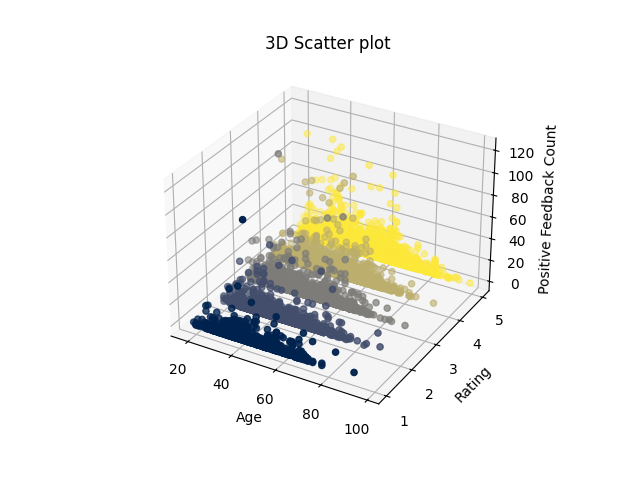

In [23]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(data['Age'], data['Rating'], data['Positive Feedback Count'],cmap='cividis',c=data['Rating'])

ax.set_title('3D Scatter plot')
ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Positive Feedback Count')
plt.show()

In [25]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



data['Review Text']=data['Review Text'].str.lower()

# Tokenize the text column
data['tokens'] = data['Review Text'].apply(word_tokenize)

# Remove stop words
stop_words=set(stopwords.words("english"))



# Filter stopwords from each tokenized text 

filtered_texts = []
for token_list in data['tokens']:
    filtered_word = []
    for word in token_list:
        if word.casefold() not in stop_words:
            filtered_word.append(word)
    filtered_texts.append(filtered_word)

data['filtered_list'] = filtered_texts

# the tokens are in list format so we use two lists

print("Before filtering:", data['tokens'].apply(len).sum())
print("After filtering:", data['filtered_list'].apply(len).sum())
print("After stop word removal : \n",data.tail(5))

# lemmatisation
lemmatizer=WordNetLemmatizer()
lemmatized_Words=[] # for all rows
for filtered_word in data['filtered_list']:
    lemmatized_text=[] # for each row
    for word in filtered_word:
         # Remove punctuation or special characters
        word = ''.join(char for char in word if char.isalpha())
        lemmatized_text.append(lemmatizer.lemmatize(word))
    lemmatized_Words.append(lemmatized_text)

data['lemmatized_words']=lemmatized_Words        
print("After Lemmatization : \n ",data.tail(5))




Before filtering: 1409656
After filtering: 775475
       Age                                              Title  \
23481   34                     Great dress for many occasions   
23482   48                         Wish it was made of cotton   
23483   31                              Cute, but see through   
23484   28  Very cute dress, perfect for summer parties an...   
23485   52                    Please make more like this one!   

                                             Review Text  Rating  \
23481  i was very happy to snag this dress at such a ...       5   
23482  it reminds me of maternity clothes. soft, stre...       3   
23483  this fit well, but the top was very see throug...       3   
23484  i bought this dress for a wedding i have this ...       3   
23485  this dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482           